# Intuition for Random Average Consensus under Various Parameters
Here we show how the standard deviation of the agents' values converges toward their mean under various experimental parameters such as different number of agents or different graph structures.

In [23]:
import matplotlib
import matplotlib.pyplot as plt
from exp_basic_scalings import run_simulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Play with below parameters

Initial mean and standard deviation in agent values are (-1.000, 9.128)
Final mean and standard deviation in agent values are (-1.000, 0.000)


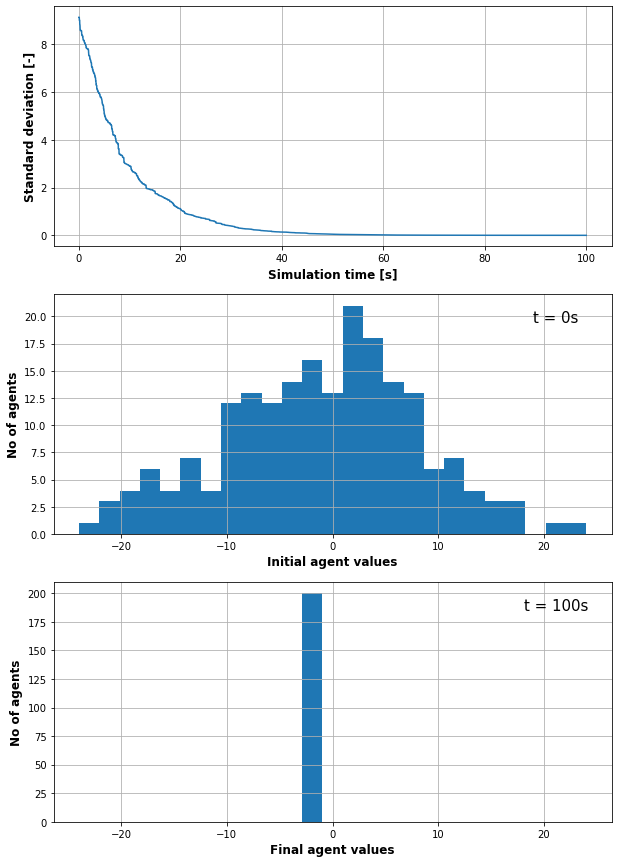

In [24]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'single'

run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)

## Number of agents
The more agents on a given graph, the faster they reach consensus since the probability of interactions increases.

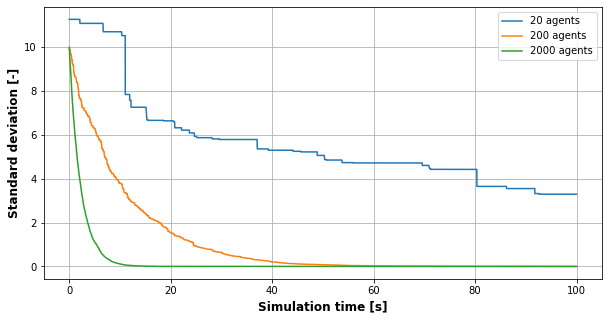

In [17]:
no_agents_list = [20, 200, 2000]
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'sweep'

plt.figure(figsize=(10,5))
for no_agents in no_agents_list:
    (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)
    plt.plot(std_rt_t, std_rt_val, label='{} agents'.format(no_agents))
plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/basic_scalings/no_agents.png')
plt.show()
plt.close()

## Graph size
The larger the graph for a given amount of agents, the slower they reach consensus since the probability of interactions decreases.

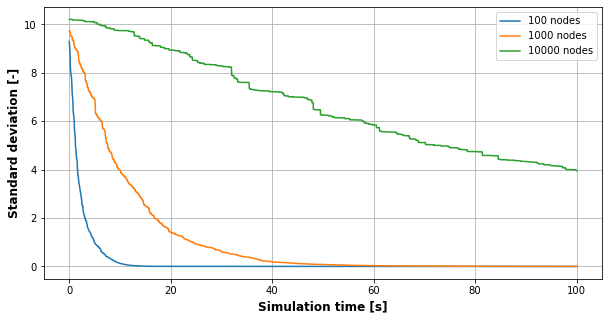

In [18]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_size_list = [100, 1000, 10000] # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'sweep'

plt.figure(figsize=(10,5))
for graph_size in graph_size_list:
    (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)
    plt.plot(std_rt_t, std_rt_val, label='{} nodes'.format(graph_size))
plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/basic_scalings/graph_size.png')
plt.show()
plt.close()

## Graph density
Graph density matters around the critical number of edges for which the graph might or might not be connected. Isolated parts of the graph cannot achieve average consenus with each other.

The threshold edge probability p to get a connected graph is 0.002


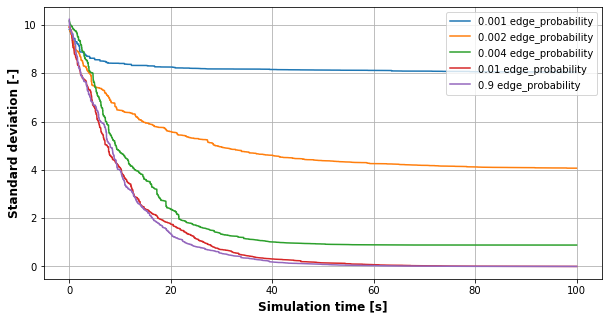

In [19]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_size = 1000 # n
no_possible_edges = graph_size*(graph_size-1)/2
min_prob = (graph_size-1) / no_possible_edges
edge_probability_list = [0.001, 0.002, 0.004, 0.01, 0.9] # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'sweep'

print('The threshold edge probability p to get a connected graph is {}'.format(min_prob))
plt.figure(figsize=(10,5))
for edge_probability in edge_probability_list:
    (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)
    plt.plot(std_rt_t, std_rt_val, label='{} edge_probability'.format(edge_probability))
plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/basic_scalings/graph_density.png')
plt.show()
plt.close()

## Initial standard deviation of values to be averaged
Average consensus takes longer if initial values are further apart.

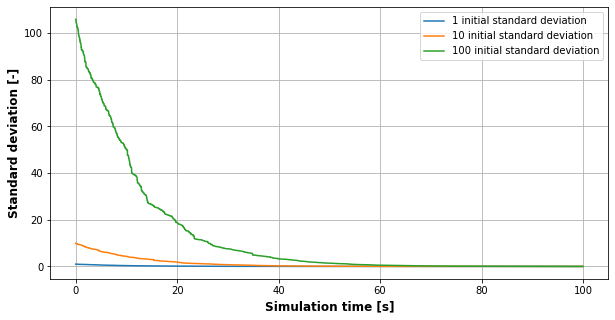

In [20]:
no_agents = 200
mu = 0 # average value
sigma_list = [1, 10, 100] # gaussian noise
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'sweep'

plt.figure(figsize=(10,5))
for sigma in sigma_list:
    (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)
    plt.plot(std_rt_t, std_rt_val, label='{} initial standard deviation'.format(sigma))
plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/basic_scalings/initial_values.png')
plt.show()
plt.close()

## Clock rates
The faster the clock rates of the agents, the more often they take action and average values, the faster they reach consensus.

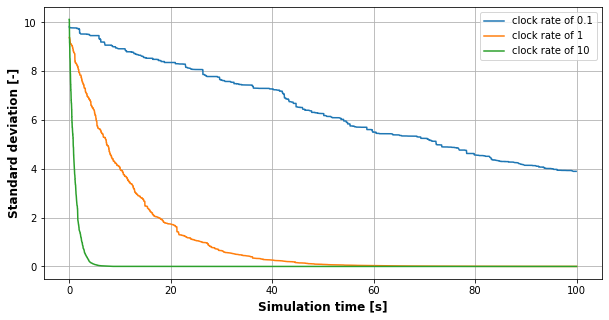

In [21]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate_list = [0.1, 1, 10] # Poisson process for asynchronous agent actions
simulation_time = 100
parameter_type = 'sweep'

plt.figure(figsize=(10,5))
for clock_rate in clock_rate_list:
    (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type)
    plt.plot(std_rt_t, std_rt_val, label='clock rate of {}'.format(clock_rate))
plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/basic_scalings/clock_rates.png')
plt.show()
plt.close()